In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

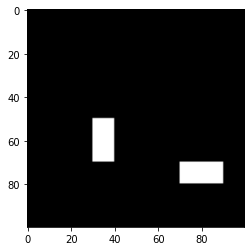

In [2]:
img = np.zeros([100,100])
img[50:70,30:40] = np.ones([20,10])
img[70:80,70:90] = np.ones([10,20])
plt.imshow(img,cmap='gray')
plt.show()

In [35]:
def masker(img,ker):
    img_ = np.zeros(img.shape)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]-1):
            img_[i][j] = img[i][j-1]*ker[0] + img[i][j+1]*ker[2] + img[i][j]*ker[1]
    return img_.astype(int)



In [56]:
def sqaureFinder(img,j_in=0):
    edged_img = masker(img.copy(),np.array([-1,2,1]))
    sqs,l,w,st,flag = [{'start':0,"length":0,"width":0}],[],[],[],False
    for i in range(edged_img.shape[0]-1):
        for j in range(edged_img.shape[1]-1):
            if img[i][j].any() != img[i][j+1].any():
                w.append(j)
            if img[i][j].any() != img[i+1][j].any():
                l.append(i)
            if img[i][j].any() != img[i+1][j+1].any():
                if flag==False:
                    st.append([i,j])
                    flag = !flag
                else:
                    flag =!flag
    #print(l,w)
    l_,w_=[],[]
    [l_.append(x) for x in l if x not in l_],[w_.append(x) for x in w if x not in w_]
    print(l_)
    st = np.array(st[0])+2
    st[1]+j_in
    return {'length':l_[1]-l_[0],'width':w_[1]-w_[0],'start':st}

In [57]:
sqaureFinder(img.copy())

[18, 84]


{'length': 66, 'width': 66, 'start': array([ 20, 220])}

In [6]:
s=[]
def finding_nemo(img,j_in=0):
    detect_temp,j_st=False,0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]-1):
            if img[i][j] != img[i][j+1] and detect_temp==False:
                detect_temp = True
                j_st = j
            elif img[i][j] != img[i][j+1] and detect_temp:
                detect_temp == False
                plt.imshow(img[:,j_st-1:j+2],cmap='gray')
                plt.show()
                s.append(sqaureFinder(img[:,j_st-1:j+2].copy(),j_in))
                s[0]['start'][1] = s[0]['start'][1]+j
                print(s)
                img[:,j_st:j+2] = np.zeros([img.shape[0],np.abs(j_st-j)+2])
                return finding_nemo(img)

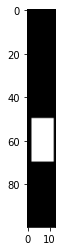

[49, 69]
[{'length': 20, 'width': 10, 'start': array([51, 42])}]


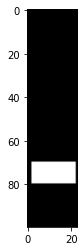

[69, 79]
[{'length': 20, 'width': 10, 'start': array([ 51, 131])}, {'length': 10, 'width': 20, 'start': array([71,  3])}]


In [7]:
finding_nemo(img.copy())

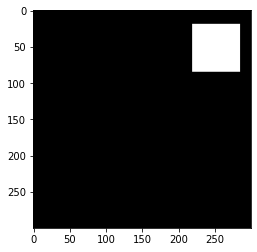

In [54]:
img = cv2.imread("2K20E22.bmp")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [58]:
sqaureFinder(img)

[18, 84]


{'length': 66, 'width': 66, 'start': array([ 20, 220])}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


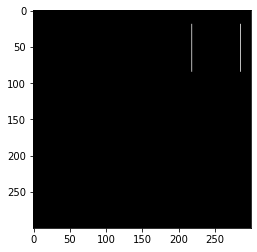

In [36]:
edged_img = masker(img.copy(),np.array([1,-2,1]))
plt.imshow(edged_img)
plt.show()

In [43]:
sqs,l,w,st,flag = [{'start':0,"length":0,"width":0}],[],[],[],False
for i in range(edged_img.shape[0]-1):
    for j in range(edged_img.shape[1]-1):
        if img[i][j].any() != img[i][j+1].any():
            w.append(j)
        if img[i][j].any() != img[i+1][j].any():
            l.append(i)
        if img[i][j].any() != img[i+1][j+1].any():
            if flag==False:
                st.append([i,j])
                flag = !flag
            else:
                flag =!flag

In [45]:
l_,w_=[],[]
[l_.append(x) for x in l if x not in l_],[w_.append(x) for x in w if x not in w_]
print(l_)
st = np.array(st[0])+2
print({'length':l_[1]-l_[0],'width':w_[1]-w_[0],'start':st})

[18, 84]
{'length': 66, 'width': 66, 'start': 22}


[18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84]